# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Modeling
from sklearn.cluster import KMeans

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

First we are going to scale the data and get the first two principal components.

In [13]:
# Scaler and PCA
scaled_variables = MinMaxScaler().fit_transform(data)
two_pca = PCA(n_components = 2).fit_transform(data)

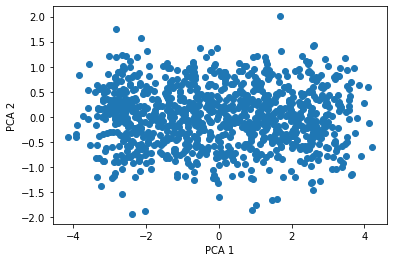

In [23]:
# Plot first two Principal Components
plt.scatter(two_pca[:, 0], two_pca[:, 1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2");

Now we are going to calculate the **WCSS** to different values of **k**.

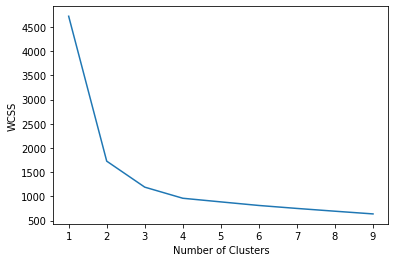

In [31]:
wcss = []# Within-Cluster Sum of Square
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# Plot WCSS
plt.plot(range(1, 10), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS");

It looks like the best choose of **k** is 2. Finally we are going to plot the clusters.

In [33]:
# Fit finall cluster
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data)

KMeans(n_clusters=2)

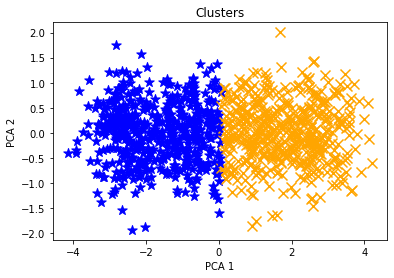

In [37]:
# Plot Clusters
col_dic = {0: 'blue', 1: 'orange'}
mrk_dic = {0: '*', 1: 'x'}
colors = [col_dic[x] for x in kmeans.labels_]
markers = [mrk_dic[x] for x in kmeans.labels_]
for sample in range(len(kmeans.labels_)):
    plt.scatter(two_pca[sample][0], two_pca[sample][1], color = colors[sample], marker = markers[sample], s = 100)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters');